In [10]:
import pandas as pd

In [14]:
accident=pd.read_csv('road-accidents.csv',comment = '#', sep = '|')
accident.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


##### COLUMN ABBREVIATIONS 
##### drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)',
##### perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)',
##### perc_fatl_alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)',
##### perc_fatl_1st_time = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)'

# Textual and a graphical summary of the data

In [16]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [15]:
accident.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


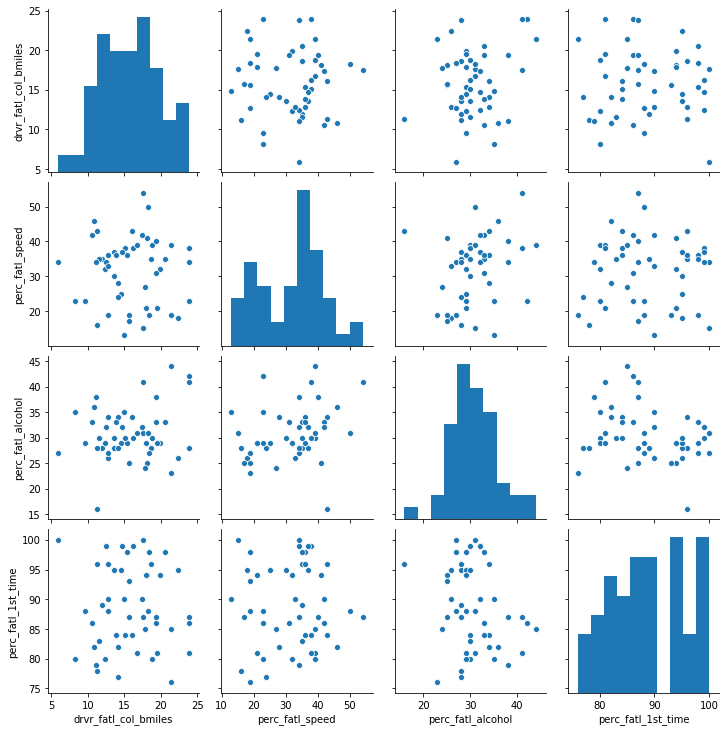

In [19]:
import seaborn as sns
data=accident
sns.pairplot(accident)

# The association of features and accidents

In [21]:
correlation=accident.corr()
correlation

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


# Fitting a multivariate linear regression Model

In [29]:
from sklearn import linear_model
features=accident[["perc_fatl_speed","perc_fatl_alcohol","perc_fatl_1st_time"]]
target=accident["drvr_fatl_col_bmiles"]
model=linear_model.LinearRegression()
model.fit(features,target)
coef=model.coef_
coef

array([-0.04180041,  0.19086404,  0.02473301])

# Performing PCA on standardized data

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [32]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(features_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

([<matplotlib.axis.XTick at 0x2167e45a7c8>,
 <a list of 3 Text xticklabel objects>)

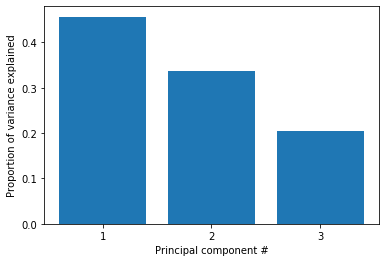

In [33]:
# Plot the proportion of variance explained on the y-axis of the bar plot
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

In [34]:
# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[1]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

The cumulative variance of the first two principal components is 0.7947


# Visualizing the first two principal components

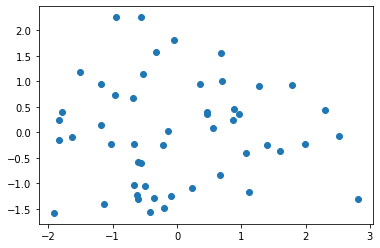

In [36]:
pca = PCA(n_components=2)
p_comps = pca.fit_transform(features_scaled)

#the first and second component to use for the scatter plot
pca_comp1 = p_comps[:,0]
pca_comp2 = p_comps[:,1]

#first two principal components in a scatter plot
plt.scatter(pca_comp1,pca_comp2)

# Finding clusters of similar states in the data

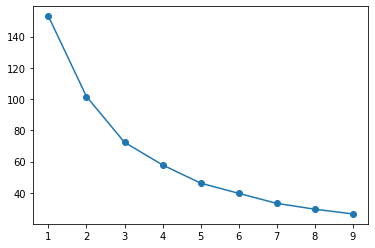

In [38]:
from sklearn.cluster import KMeans

# A loop will be used to plot the explanatory power for up to 10 KMeans clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Initialize the KMeans object using the current number of clusters (k)
    km = KMeans(n_clusters=k, random_state=8)
    # Fit the scaled features to the KMeans object
    km.fit(features_scaled)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)
    
# Plot the results in a line plot
plt.plot(ks, inertias, marker='o')

# KMeans to visualize clusters in the PCA scatter plot

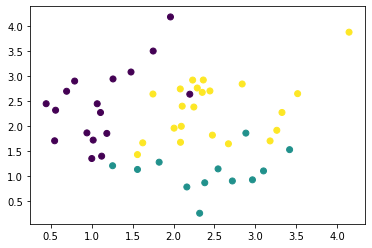

In [43]:
# Creating a KMeans object with 3 clusters
km = KMeans(n_clusters=3, random_state=24)

# Fitting the data to the `km` object
p_comps = km.fit_transform(features_scaled)

# Creating a scatter plot of the first two principal components
# and coloring it according to the KMeans cluster assignment 
plt.scatter(p_comps[:,0], p_comps[:,1], c=km.labels_)

# Visualizing the feature differences between the clusters 

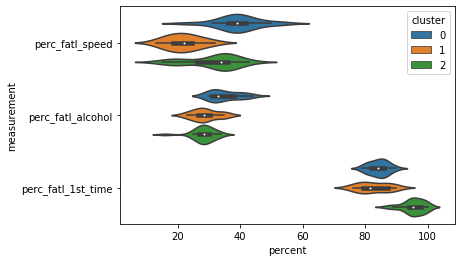

In [47]:
# Creating a new column with the labels from the KMeans clustering
accident['cluster'] = km.labels_

# Reshape the DataFrame to the long format
accident1 = pd.melt(accident, id_vars="cluster", var_name="measurement", value_name="percent", value_vars=features)

# Create a violin plot splitting and coloring the results according to the km-clusters
sns.violinplot(x=accident1["percent"], y=accident1["measurement"], hue=accident1["cluster"])

# Computing the number of accidents within each cluster

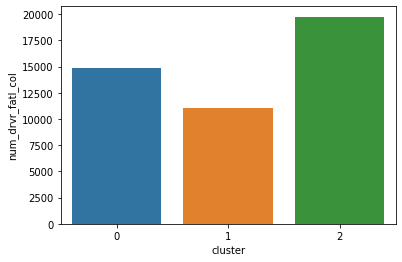

In [52]:
# Reading the new dataset
miles_driven = pd.read_csv('miles-driven.csv', sep='|')

# Merge the `car_acc` DataFrame with the `miles_driven` DataFrame
car_acc_miles = pd.merge(accident, miles_driven, on="state")

# Create a new column for the number of drivers involved in fatal accidents
car_acc_miles['num_drvr_fatl_col'] = car_acc_miles['drvr_fatl_col_bmiles']*car_acc_miles["million_miles_annually"]/1000

# Create a barplot of the total number of accidents per cluster
sns.barplot(x=car_acc_miles["cluster"], y=car_acc_miles["num_drvr_fatl_col"], data=car_acc_miles, estimator=sum, ci=None)

In [53]:
# Calculate the number of states in each cluster and their 'num_drvr_fatl_col' mean and sum.
count_mean_sum = car_acc_miles.groupby("cluster")["num_drvr_fatl_col"].agg(["count", "mean", "sum"])
count_mean_sum

,count,mean,sum
cluster,,,
0,17,872.132759,14826.2569
1,12,920.385367,11044.6244
2,22,898.378595,19764.3291


# Making a decision when there is no clear right choice

In [54]:
Cluster_Number=2